## MODEL COMPARISON

This notebook comprises implementation of various ML models on the AVHRR dataset:
1) Linear Regression
2) KNN Regression 
3) Decision Tree Regression

In [2]:
# get the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [2]:
#dataset loading and splitting between test and train
train_data = np.loadtxt(r"C:\Users\Jyoti_Shukla\Documents\Jyoti\Peninsular\Padded_Peninsular_Train_AVHRR_data_1981_2022.txt").reshape(1900,448,576)
test_data = np.loadtxt(r"C:\Users\Jyoti_Shukla\Documents\Jyoti\Peninsular\Padded_Peninsular_Test_AVHRR_data_1981_2022.txt").reshape(61,448,576)
X_train = train_data[:-1] 
y_train = train_data[1:] #label is the next time step image
X_test = test_data[:-1]
y_test = test_data[1:]
print(train_data.shape,test_data.shape,train_data.max(),test_data.max())
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1900, 448, 576) (61, 448, 576) 100.0 100.0
(1899, 448, 576) (60, 448, 576) (1899, 448, 576) (60, 448, 576)


In [4]:
# scaled data loading
# dataset = load_real_samples("F:\Jyoti Shukla -MS\Peninsular dataset\paired_padded_peninsular_arrays_train_AVHRR_data.npz")
# dataset_test = load_real_samples("F:\Jyoti Shukla -MS\Peninsular dataset\paired_padded_peninsular_arrays_test_AVHRR_data.npz")
paired_train = np.load(r"C:\Users\Jyoti_Shukla\Documents\Jyoti\Peninsular\paired_padded_peninsular_arrays_train_AVHRR_data.npz")
train_image, train_label = paired_train['x'],paired_train['y']

train_image.shape,train_label.shape


((1899, 448, 576, 1), (1899, 448, 576, 1))

In [5]:
paired_test = np.load(r"C:\Users\Jyoti_Shukla\Documents\Jyoti\Peninsular\paired_padded_peninsular_arrays_test_AVHRR_data.npz")
test_image, test_label = paired_test['x'],paired_test['y']

In [6]:
def unscale(mat, VHI_test):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(VHI_test.reshape(448,576))
  unscaled = scaler.inverse_transform(mat.reshape(448,576))
  return unscaled


In [7]:
def colorcoding(mat):
  for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
      #print(mat[i][j])
      if  mat[i][j] >80:
        mat[i][j] = 255
      # elif (mat[i][j]<80) &(mat[i][j] >70):             # Abnormally Dry
      #   mat[i][j]= 128
      elif (mat[i][j]<80) &(mat[i][j] >60):             # Abnormally Dry
        mat[i][j]= 128
      # elif (mat[i][j]<60) &(mat[i][j] >50):             # Abnormally Dry
      #   mat[i][j]= 64
      elif (mat[i][j]<60) &(mat[i][j] >40):             # Abnormally Dry
        mat[i][j]= 64
      # elif (mat[i][j]<40) &(mat[i][j] >30):             # Abnormally Dry
      #   mat[i][j]= 16
      elif (mat[i][j]<40) &(mat[i][j]>20):              # Moderate drought
        mat[i][j] = 32
      # elif (mat[i][j]<20) & (mat[i][j]>10):             # Severe drought
      #   mat[i][j] = 4
      elif (mat[i][j])<20:                              # Extreme  drought
        mat[i][j]= 0
  return mat

In [6]:
train_image_flattened = train_image.reshape(1899,258048)
train_label_flattened = train_label.reshape(1899,258048)
train_image_flattened.shape

(1899, 258048)

In [7]:
train_image = train_image[:50]
train_label = train_label[:50]
train_image_flattened = train_image.reshape(50,258048)
train_label_flattened = train_label.reshape(50,258048)

In [8]:
np.all(np.isfinite(train_image_flattened))

True

## *LINEAR REGRESSION*

In [8]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_image_flattened,train_label_flattened)

MemoryError: Unable to allocate 496. GiB for an array with shape (258048, 258048) and data type float64

In [15]:
pred = model.predict(test_image[0].reshape(1,258048))
pred

array([[0., 0., 0., ..., 0., 0., 0.]])

0.6724641958725427


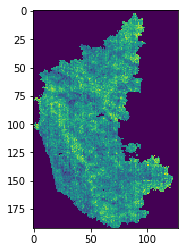

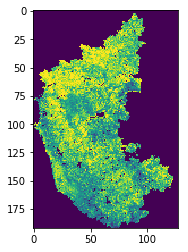

In [19]:
from sklearn.metrics import r2_score
pred = pred.reshape(192,128)
yreal = test_image[0].reshape(192,128)
r2 = r2_score(yreal,pred)
print(r2)
plt.imshow(pred)
plt.show()
plt.imshow(yreal)

Trying on full data :

In [7]:
train_image_set = train_image[:]
train_label_set = train_label[:]
train_image_flattened = train_image_set.reshape(1899,258048)
train_label_flattened = train_label_set.reshape(1899,258048)

In [8]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_image_flattened,train_label_flattened)

LinearRegression()

In [10]:
predicted = model.predict(test_image.reshape(60,258048))
predicted = predicted.reshape(60,192,128)
print(predicted.shape)
np.save("F:\Jyoti Shukla -MS\codes\AVHRR codes/Predicted_outputs_LR.npy", predicted)

(60, 192, 128)


<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.0002259268>>
0.001977790958062339 0.9815882740570229


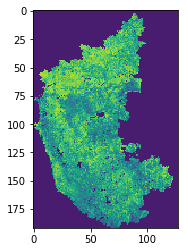

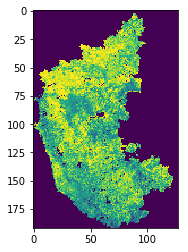

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import tensorflow as tf
predicted = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes/Predicted_outputs_LR.npy")
pred = predicted[0].reshape(192,128)
yreal = test_label[0].reshape(192,128)
r2 = r2_score(yreal,pred)
error = mse(yreal,pred)
huber = tf.keras.losses.Huber(delta=0.01)
print(huber(yreal,pred).numpy)
print(error,r2)
plt.imshow(pred)
plt.show()
plt.imshow(yreal)

In [25]:
unscale_pred = unscale(pred,y_test[0])
unscale_real = unscale(yreal,y_test[0])
colorcoded_pred = colorcoding(unscale_pred)
colorcoded_real = colorcoding(unscale_real)
colorcoded_pred.shape, colorcoded_real.shape, np.vstack((colorcoded_real.reshape(1,192,128),colorcoded_pred.reshape(1,192,128)))[1].shape

((192, 128), (192, 128), (192, 128))

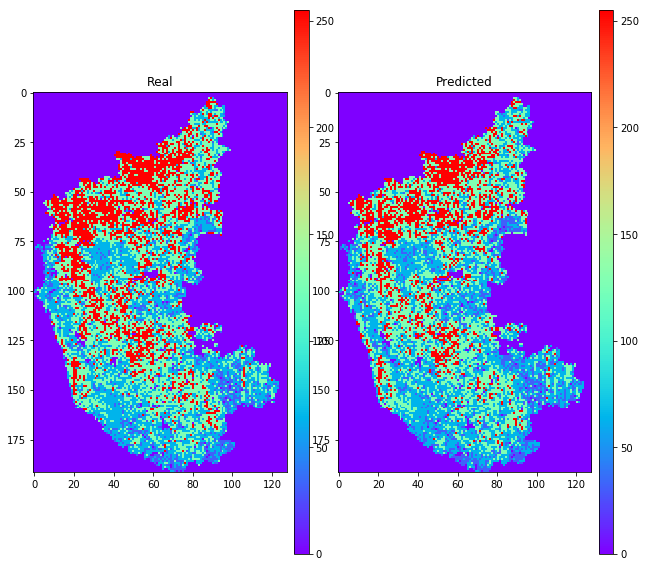

In [26]:
images = [colorcoded_real, colorcoded_pred]
titles =["Real","Predicted"]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# for idx, ax in enumerate(axes):
#     pos = ax.imshow(np.squeeze(images[idx]), cmap="Blues")
#     ax.set_title(titles [idx])
#     cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
#     fig.colorbar(pos, ax = ax, cax =cax)
#     ax.axis("off")
for i in range(len(images)):
    pos = ax[i].imshow(images[i].reshape(192,128), cmap="rainbow")
    #ax.set_title(f"Original Frame {idx}")
    cax = fig.add_axes([ax[i].get_position().x1+0.01,ax[i].get_position().y0,0.02,ax[i].get_position().height])
    fig.colorbar(pos, ax = ax[i], cax =cax)
    ax[i].set_title(titles[i])
    #ax.axis("off")

In [35]:
R2 =[]
error =[]
yhat =[]
for i in range(len(test_image)):
    pred = predicted[i].reshape(192,128)
    yreal = test_label[i].reshape(192,128)
    r2 = r2_score(yreal,pred)
    err = mae(yreal,pred)
    yhat.append(pred)
    R2.append(r2)
    error.append(err)
print(R2)
np.save("F:\Jyoti Shukla -MS\codes\AVHRR codes/R2_score_LR.npy", R2)
np.save("MAE_for_LR.npy", error)

[0.9815882740570229, 0.9739353990578514, 0.9664468449643531, 0.9546803724162269, 0.9455312428482237, 0.9305366929797844, 0.9182593582490137, 0.9161644805262416, 0.913538287118069, 0.9197439617926352, 0.9176960442462215, 0.9154786692976264, 0.9125509435441813, 0.9149539765262104, 0.9240176797361646, 0.9290325349691502, 0.9312216179152563, 0.9352814056423818, 0.941428815238986, 0.9433237773738393, 0.9462817735432341, 0.949259743248186, 0.9535128190090288, 0.9534352043081794, 0.9504780268141679, 0.9485773417216544, 0.9416923767847795, 0.9331433149694113, 0.9285029509379026, 0.9292021165784952, 0.9336763740838452, 0.9416703201281207, 0.9464457336247006, 0.9526339710587033, 0.9596015826149775, 0.9579268381803447, 0.9486718972267059, 0.9421886385825377, 0.9353814478248819, 0.9383534940715005, 0.9393303401139779, 0.9408872786534958, 0.9425577656648421, 0.9410478971149094, 0.9391251236842705, 0.9396306527726702, 0.9302072591327235, 0.9237479567995897, 0.9294659494537888, 0.9439700204880221, 0.

In [15]:
MSE =[]
for i in range(len(test_image)):
    pred = predicted[i].reshape(192,128)
    yreal = test_label[i].reshape(192,128)
    #r2 = r2_score(yreal,pred)
    err = mse(yreal,pred)
    #yhat.append(pred)
    #R2.append(r2)
    MSE.append(err)
print(MSE)
#np.save("F:\Jyoti Shukla -MS\codes\AVHRR codes/R2_score_LR.npy", R2)
np.save("MSE_for_LR.npy", MSE)

[0.001977790958062339, 0.0028597056427281916, 0.0035324400546114685, 0.0046262857354692506, 0.005406260439479761, 0.0061834214285394, 0.006559336789315595, 0.006366288309169925, 0.006390272685758898, 0.005936504747897653, 0.00607998627790071, 0.006218347184229074, 0.006322197710574722, 0.006211126013037763, 0.0056361335965375604, 0.005272499308781853, 0.005204934630563663, 0.004898800102455578, 0.004767817811364558, 0.004750664202985054, 0.004634147909415052, 0.004502154962098584, 0.004256416780750189, 0.0043138774773649885, 0.004703057293383444, 0.005007205215897825, 0.0056988921714898905, 0.006764098511152282, 0.007281749717404141, 0.007191329330945493, 0.006917334659984028, 0.0063076388141241856, 0.0061225248992155465, 0.0056193212336519876, 0.005028775224384645, 0.0049403201833934495, 0.005932299380300611, 0.006569551939642102, 0.007182798579367322, 0.006524260808043985, 0.006145408594012238, 0.005683085764821532, 0.005274464561221808, 0.005359409478382532, 0.005708127577715338, 0.

[0.02501131 0.0299169  0.03293216 0.03752473 0.04072033 0.04382343
 0.04514643 0.04436909 0.04437128 0.04236051 0.04284094 0.04358427
 0.04403819 0.04379213 0.04181674 0.04061815 0.04023059 0.0389617
 0.03850846 0.03850334 0.03815412 0.03750779 0.03621071 0.03633715
 0.0381677  0.03953337 0.04258027 0.04649561 0.04839355 0.04803331
 0.04704427 0.04495785 0.04424895 0.04214286 0.03954113 0.03903902
 0.04304785 0.04546741 0.04743655 0.04483332 0.04333745 0.04169996
 0.04018722 0.04047346 0.04194468 0.04366807 0.04644656 0.04960241
 0.04857539 0.04363737 0.04111152 0.04150421 0.04084216 0.03964442
 0.03730966 0.03867785 0.03913241 0.04152936 0.04437373 0.04719382]


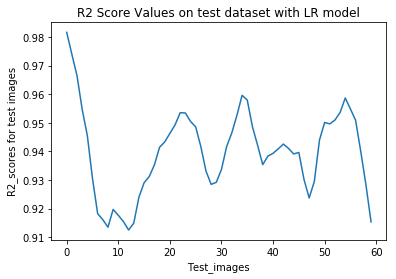

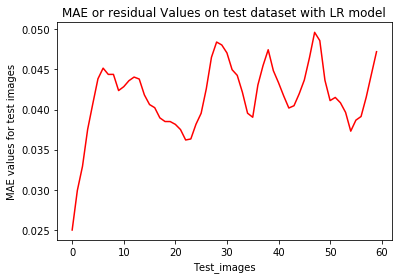

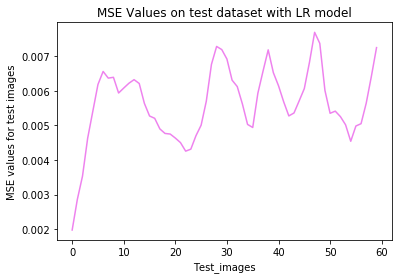

In [12]:
R2 = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes/R2_score_LR.npy")
error = np.load("MAE_for_LR.npy")
MSE = np.load("MSE_for_LR.npy")
print(error)
plt.plot(R2)
plt.xlabel("Test_images")
plt.ylabel("R2_scores for test images")
plt.title("R2 Score Values on test dataset with LR model")
plt.show()
plt.plot(error,color='red')
plt.xlabel("Test_images")
plt.ylabel("MAE values for test images")
plt.title("MAE or residual Values on test dataset with LR model")
plt.show()
plt.plot(MSE, 'violet')
plt.xlabel("Test_images")
plt.ylabel("MSE values for test images")
plt.title("MSE Values on test dataset with LR model")
#plt.legend(["MAE","MSE"])
plt.show()

In [37]:
predicted[1].shape

(192, 128)

## *KNN REGRESSOR*

In [21]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor()
model_KNN.fit(train_image_flattened,train_label_flattened)

KNeighborsRegressor()

In [22]:
pred = model_KNN.predict(test_image[0].reshape(1,258048))
pred

array([[0., 0., 0., ..., 0., 0., 0.]])

0.6516665954560183


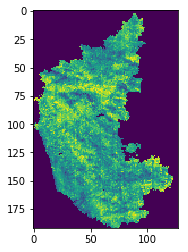

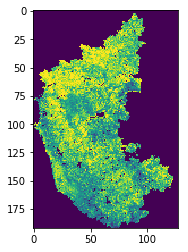

In [23]:
from sklearn.metrics import r2_score
pred = pred.reshape(192,128)
yreal = test_image[0].reshape(192,128)
r2 = r2_score(yreal,pred)
print(r2)
plt.imshow(pred)
plt.show()
plt.imshow(yreal)

Trying for complete data

In [38]:
train_image_set = train_image[:]
train_label_set = train_label[:]
train_image_flattened = train_image_set.reshape(1899,258048)
train_label_flattened = train_label_set.reshape(1899,258048)

In [40]:
from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor()
model_KNN.fit(train_image_flattened,train_label_flattened)

KNeighborsRegressor()

In [42]:
predicted_KNN = model_KNN.predict(test_image.reshape(60,258048))
predicted_KNN = predicted_KNN.reshape(60,192,128)
print(predicted_KNN.shape)
np.save("F:\Jyoti Shukla -MS\codes\AVHRR codes/predicted_output_KNN.npy", predicted_KNN)

(60, 192, 128)


0.006052381370822042 0.9440439894490326


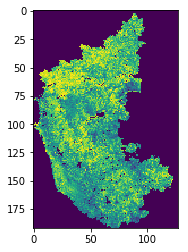

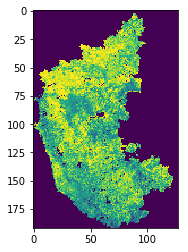

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
predicted_KNN = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes/predicted_output_KNN.npy")
pred = predicted_KNN[0].reshape(192,128)
yreal = test_label[0].reshape(192,128)
r2 = r2_score(yreal,pred)
error = mse(yreal,pred)
print(error,r2)
plt.imshow(pred)
plt.show()
plt.imshow(yreal)

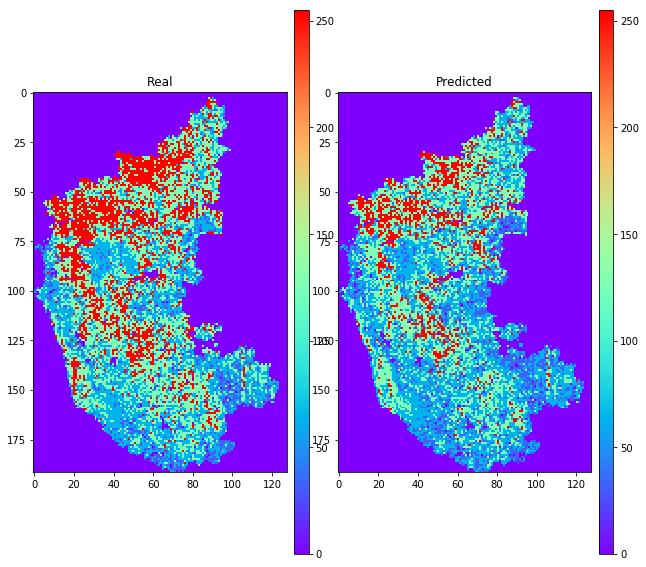

In [28]:
unscale_pred = unscale(pred,y_test[0])
unscale_real = unscale(yreal,y_test[0])
colorcoded_pred = colorcoding(unscale_pred)
colorcoded_real = colorcoding(unscale_real)
images = [colorcoded_real, colorcoded_pred]
titles =["Real","Predicted"]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for i in range(len(images)):
    pos = ax[i].imshow(images[i].reshape(192,128), cmap="rainbow")
    #ax.set_title(f"Original Frame {idx}")
    cax = fig.add_axes([ax[i].get_position().x1+0.01,ax[i].get_position().y0,0.02,ax[i].get_position().height])
    fig.colorbar(pos, ax = ax[i], cax =cax)
    ax[i].set_title(titles[i])
    #ax.axis("off")

In [46]:
R2_KNN =[]
error_KNN =[]
yhat_KNN =[]
for i in range(len(test_image)):
    pred = predicted_KNN[i].reshape(192,128)
    yreal = test_label[i].reshape(192,128)
    r2 = r2_score(yreal,pred)
    err = mae(yreal,pred)
    yhat_KNN.append(pred)
    R2_KNN.append(r2)
    error_KNN.append(err)
print(R2_KNN)
np.save("R2_score_KNN.npy",R2_KNN)
np.save("MAE_for_KNN.npy",error_KNN)

[0.9440439894490326, 0.9294860494843988, 0.9209954325427911, 0.9136467116348361, 0.8930389161612973, 0.9025375079984153, 0.8974112199333648, 0.9020380177736207, 0.9026767071426933, 0.913459418170778, 0.9221807097972715, 0.9135812221122999, 0.9122118914211557, 0.9283675033290428, 0.9348337222951111, 0.9336614918201708, 0.9393628096926174, 0.9410642734032741, 0.9457517182601891, 0.9484288104680245, 0.9513728773692108, 0.9558563298182714, 0.9582262030041292, 0.9570876043412343, 0.9541143819260322, 0.9496305503725425, 0.9472112057739348, 0.9351185390772541, 0.9390548879163386, 0.9395023528177091, 0.9443860251323974, 0.9486694107787778, 0.9544806147692853, 0.9573499506221503, 0.9562647786613373, 0.9624514461525115, 0.956690270681036, 0.9579490586061554, 0.95688215459683, 0.9531769577356665, 0.9480213164105233, 0.9492693399295749, 0.9484439701478394, 0.9451333328108316, 0.9349295365408428, 0.9208124091926646, 0.9179282425442528, 0.9107533767455303, 0.9142024649409928, 0.9101144970986954, 0.9

In [24]:
predicted_KNN = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\predicted_output_KNN.npy")
R2_KNN = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\R2_score_KNN.npy")
error_KNN = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\MAE_for_KNN.npy")
MSE_KNN = []
for i in range(len(test_image)):
    pred = predicted_KNN[i].reshape(192,128)
    yreal = test_label[i].reshape(192,128)
    #r2 = r2_score(yreal,pred)
    err = mse(yreal,pred)
    #yhat_KNN.append(pred)
    # R2_KNN.append(r2)
    MSE_KNN.append(err)
print(MSE_KNN)
#np.save("R2_score_KNN.npy",R2_KNN)
np.save("MSE_for_KNN.npy",MSE_KNN)

[0.006052381370822042, 0.0077725504399395445, 0.008640285327577966, 0.009118990287394197, 0.010716810125600374, 0.008743337437991059, 0.008162799458025408, 0.007430175855534524, 0.00704285683907091, 0.006256663471350637, 0.005648180853011958, 0.006213277822660509, 0.0062371434460175455, 0.005167525675773709, 0.004803900610683636, 0.004887635115713291, 0.004636320037478703, 0.004592939744019784, 0.004477331887173653, 0.004414859710875992, 0.004267093769679159, 0.00398412050811877, 0.003946686061706828, 0.00413179809755194, 0.0045712201649123554, 0.005067342289232695, 0.005272586579369543, 0.006710878982286988, 0.006176978012742267, 0.006212417008467985, 0.005979284415510387, 0.005747090830111619, 0.005371246840270301, 0.005124892198984809, 0.0055247188734592004, 0.004453062741685121, 0.005107146823805841, 0.004898949181946605, 0.004890607127398923, 0.00510608386716782, 0.0052428319412450505, 0.004949497569586684, 0.004794402626044813, 0.005010462787866034, 0.00607053553323334, 0.0077457

In [27]:
error_KNN[34:37], R2_KNN[34:37], MSE_KNN[34:37]

(array([0.0395238 , 0.03442912, 0.03766461]),
 array([0.95626478, 0.96245145, 0.95669027]),
 [0.0055247188734592004, 0.004453062741685121, 0.005107146823805841])

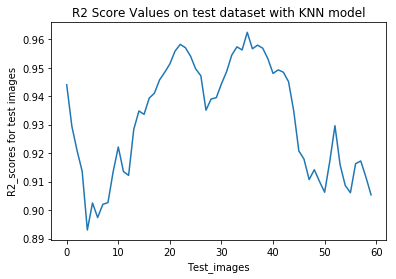

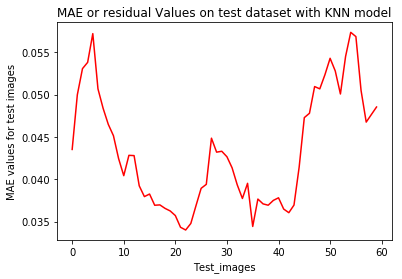

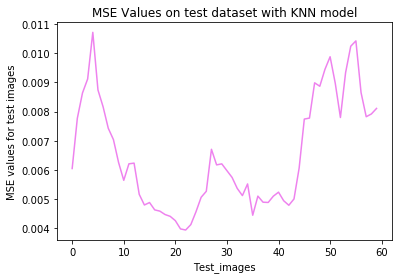

In [16]:
R2_KNN = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\R2_score_KNN.npy")
error_KNN = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\MAE_for_KNN.npy")
MSE_KNN = np.load("MSE_for_KNN.npy")
plt.plot(R2_KNN)
plt.xlabel("Test_images")
plt.ylabel("R2_scores for test images")
plt.title("R2 Score Values on test dataset with KNN model")
plt.show()
plt.plot(error_KNN,color='red')
plt.xlabel("Test_images")
plt.ylabel("MAE values for test images")
plt.title("MAE or residual Values on test dataset with KNN model")
plt.show()
plt.plot(MSE_KNN, 'violet')
plt.xlabel("Test_images")
plt.ylabel("MSE values for test images")
plt.title("MSE Values on test dataset with KNN model")
plt.show()

## *DECISION TREE REGRESSOR*

In [24]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
model_DT.fit(train_image_flattened,train_label_flattened)

DecisionTreeRegressor()

In [25]:
pred = model_DT.predict(test_image[0].reshape(1,258048))
pred

array([[0., 0., 0., ..., 0., 0., 0.]])

0.599743495155191


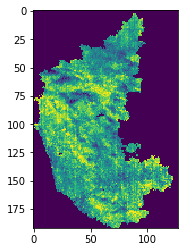

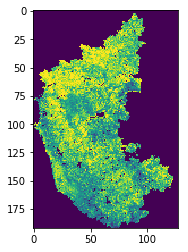

In [26]:
from sklearn.metrics import r2_score
pred = pred.reshape(192,128)
yreal = test_image[0].reshape(192,128)
r2 = r2_score(yreal,pred)
print(r2)
plt.imshow(pred)
plt.show()
plt.imshow(yreal)

Trying on full data

In [7]:
train_image_set = train_image[:]
train_label_set = train_label[:]
train_image_flattened = train_image_set.reshape(1899,258048)
train_label_flattened = train_label_set.reshape(1899,258048)

In [9]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor()
model_DT.fit(train_image_flattened,train_label_flattened)

DecisionTreeRegressor()

In [14]:
predicted_DT = model_DT.predict(test_image.reshape(60,258048))
predicted_DT = predicted_DT.reshape(60,448,576)
print(predicted_DT.shape)
np.save("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/Predicted_outputs_DT_peninsular.npy",predicted_DT)

(60, 448, 576)


0.10299808411526501 0.5663228629101802


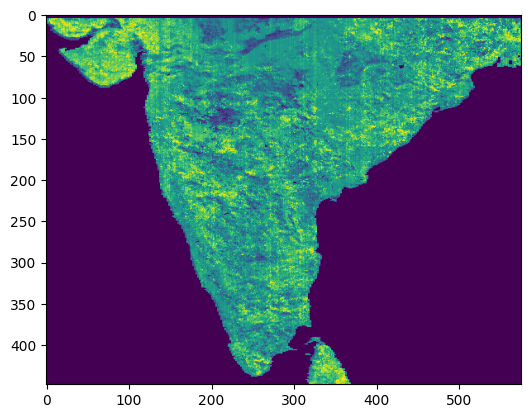

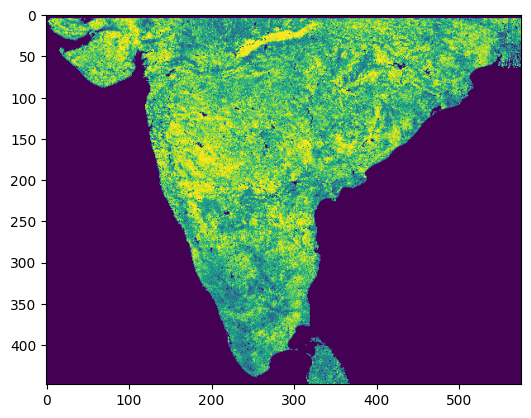

In [8]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
predicted_DT = np.load("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/Predicted_outputs_DT_peninsular.npy")
pred = predicted_DT[0].reshape(448,576)
yreal = test_label[0].reshape(448,576)
r2 = r2_score(yreal,pred)
error = mae(yreal,pred)
print(error,r2)
plt.imshow(pred)
plt.show()
plt.imshow(yreal)

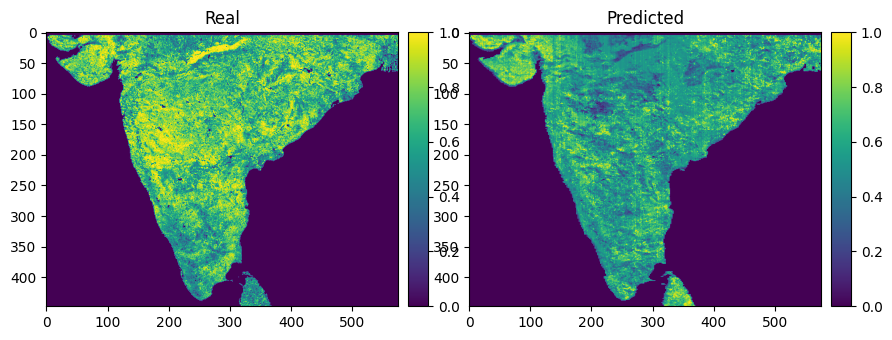

In [10]:
images = [yreal, pred]
titles =["Real","Predicted"]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for i in range(len(images)):
    pos = ax[i].imshow(images[i].reshape(448,576))
    #ax.set_title(f"Original Frame {idx}")
    cax = fig.add_axes([ax[i].get_position().x1+0.01,ax[i].get_position().y0,0.02,ax[i].get_position().height])
    fig.colorbar(pos, ax = ax[i], cax =cax)
    ax[i].set_title(titles[i])
    #ax.axis("off")

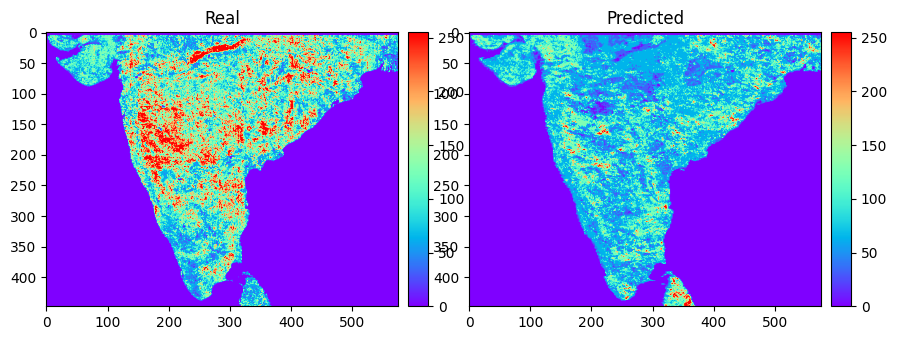

In [16]:
unscale_pred = unscale(pred,y_test[0])
unscale_real = unscale(yreal,y_test[0])
colorcoded_pred = colorcoding(unscale_pred)
colorcoded_real = colorcoding(unscale_real)
images = [colorcoded_real, colorcoded_pred]
titles =["Real","Predicted"]
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for i in range(len(images)):
    pos = ax[i].imshow(images[i].reshape(448,576), cmap="rainbow")
    #ax.set_title(f"Original Frame {idx}")
    cax = fig.add_axes([ax[i].get_position().x1+0.01,ax[i].get_position().y0,0.02,ax[i].get_position().height])
    fig.colorbar(pos, ax = ax[i], cax =cax)
    ax[i].set_title(titles[i])
    #ax.axis("off")

In [19]:
from sklearn.metrics import mean_squared_error as mse
R2_DT =[]
error_DT =[]
yhat_DT =[]
MSE_DT = []
for i in range(len(test_image)):
    pred = predicted_DT[i].reshape(448,576)
    yreal = test_label[i].reshape(448,576)
    r2 = r2_score(yreal,pred)
    err = mae(yreal,pred)
    mse_err = mse(yreal,pred)
    yhat_DT.append(pred)
    R2_DT.append(r2)
    MSE_DT.append(mse_err)
    error_DT.append(err)
print(R2_DT)
np.save("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/R2_score_DT_peninsular.npy", R2_DT)
np.save("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/MAE_for_DT_peninsular.npy", error_DT)
np.save("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/MSE_for_DT_peninsular.npy", MSE_DT)

[0.5663228629101802, 0.5593329473716824, 0.5560673091281496, 0.5596477060716892, 0.563426866613634, 0.5777701392256325, 0.5853624566776803, 0.43481750736754865, 0.5011065884085715, 0.47467410850725045, 0.4408224042152328, 0.4155983676083214, 0.4004644058292388, 0.39185070717268566, 0.3996575336299418, 0.41796017319136897, 0.42951664958258645, 0.46528520677005314, 0.4844431417645081, 0.4906745998388595, 0.4804304092677348, 0.43247314453095165, 0.3152209798287295, 0.5801643922765904, 0.5407418252161492, 0.5320046515842072, 0.5341719704475371, 0.5370671261239307, 0.5462950918289464, 0.5502080637133212, 0.5547951381314352, 0.46863446550622495, 0.4628079651946362, 0.4801239466809104, 0.48089363933483065, 0.5573788649524123, 0.5586360091959232, 0.5293592018918846, 0.5770677614628679, 0.5755543911630436, 0.5726437697291525, 0.534125661447508, 0.5403628279134125, 0.5069977871787911, 0.4574908912320617, 0.47613182407380705, 0.3949366085673413, 0.3801894712552434, 0.3905501963496543, 0.408077134

In [28]:
predicted_DT = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\Predicted_outputs_DT.npy")
R2_DT = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\R2_score_DT.npy")
error_DT = np.load("F:\Jyoti Shukla -MS\codes\AVHRR codes\MAE_for_DT.npy")
MSE_DT = []
for i in range(len(test_image)):
    pred = predicted_DT[i].reshape(192,128)
    yreal = test_label[i].reshape(192,128)
    #r2 = r2_score(yreal,pred)
    err = mse(yreal,pred)
    #yhat_KNN.append(pred)
    # R2_KNN.append(r2)
    MSE_DT.append(err)
print(MSE_DT)
#np.save("R2_score_KNN.npy",R2_KNN)
np.save("MSE_for_DT.npy",MSE_DT)

[0.004418430753043283, 0.007527662480866105, 0.013678579149573088, 0.019099001551844373, 0.02684616500975473, 0.03729988383149397, 0.03448978279881812, 0.020281538736268506, 0.008224715349376955, 0.034418283503689744, 0.006377239371196795, 0.00770119010544585, 0.01012367984553217, 0.007481947894358908, 0.01475254704135849, 0.013747308968884011, 0.014080074508063728, 0.01385060976131969, 0.005154101378367099, 0.006548045411395016, 0.011400028229578491, 0.0118352193700299, 0.011443766384751784, 0.008546190392462742, 0.006634889551759188, 0.009174101085358172, 0.009180932656631658, 0.015076101125273163, 0.016159602565791704, 0.014886426035513505, 0.013526130107084353, 0.02747577922961987, 0.029779502953874378, 0.03168493366768505, 0.03441370805596, 0.027631078839918423, 0.005759544955699119, 0.024020760807007366, 0.02198449158241938, 0.021056004582579377, 0.020130929098059795, 0.019111485078206404, 0.03135831882745288, 0.03163765618376577, 0.035099445035293844, 0.03613994651791475, 0.0343

In [30]:
error_DT[:3], MSE_DT[:3], R2_DT[:3]

(array([0.03604691, 0.04741381, 0.06484822]),
 [0.004418430753043283, 0.007527662480866105, 0.013678579149573088],
 array([0.9598623 , 0.9323728 , 0.87618778]))

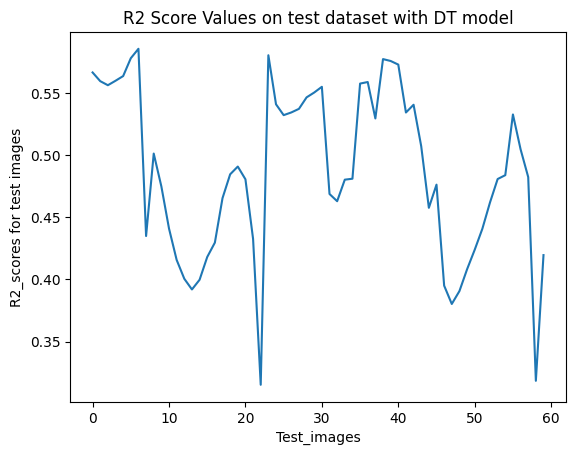

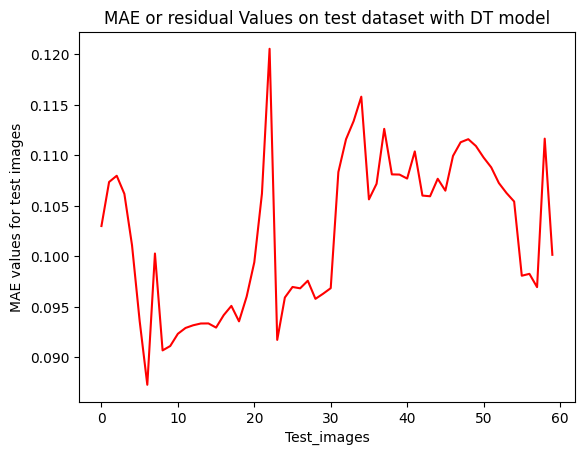

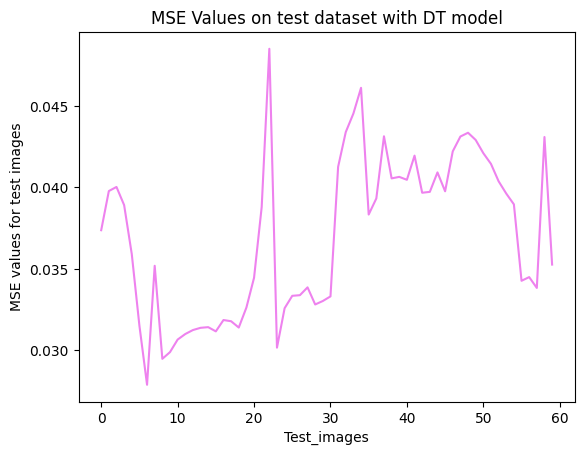

In [20]:
R2_DT = np.load("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/R2_score_DT_peninsular.npy")
error_DT = np.load("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/MAE_for_DT_peninsular.npy")
MSE_DT = np.load("E:\Jyoti Shukla - MS\codes\AVHRR codes\peninsular codes/MSE_for_DT_peninsular.npy")
plt.plot(R2_DT)
plt.xlabel("Test_images")
plt.ylabel("R2_scores for test images")
plt.title("R2 Score Values on test dataset with DT model")
plt.show()
plt.plot(error_DT,color='red')
plt.xlabel("Test_images")
plt.ylabel("MAE values for test images")
plt.title("MAE or residual Values on test dataset with DT model")
plt.show()
plt.plot(MSE_DT, 'violet')
plt.xlabel("Test_images")
plt.ylabel("MSE values for test images")
plt.title("MSE Values on test dataset with DT model")
plt.show()

In [21]:
np.mean(R2_DT), np.max(R2_DT), np.mean(error_DT), np.mean(MSE_DT)

(0.48697093287083315,
 0.5853624566776803,
 0.1023486213015295,
 0.03699076600068205)

In [64]:
train_image_set = train_image[:10]
train_label_set = train_label[:10]
train_image_flattened = train_image_set.reshape(10,258048)
train_label_flattened = train_label_set.reshape(10,258048)

## *CHAINED MULTIOUTPUT REGRESSION MODEL*

In [11]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR 
from sklearn.ensemble import GradientBoostingRegressor
#SGDreg = SGDRegressor()
gbr = GradientBoostingRegressor(random_state=0)
#linsvr = LinearSVR(max_iter = 20000)
chain = RegressorChain(base_estimator=gbr).fit(train_image_flattened, train_label_flattened)

KeyboardInterrupt: 

In [101]:
pred = chain.predict(test_image.reshape(60,258048))
pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [102]:
pred.shape

(60, 24576)

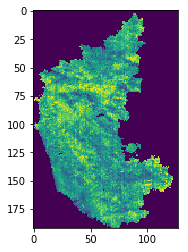

In [103]:
predicted = pred[0].reshape(192,128)
plt.imshow(predicted)

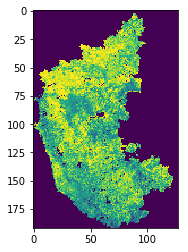

In [104]:
plt.imshow(test_label[0].reshape(192,128))

In [98]:
test_label[1].reshape(192,128)
np.unique(pred), np.unique(test_label[1].reshape(192,128))

(array([0.        , 0.06503919, 0.14161984, ..., 1.13366077, 1.13617015,
        1.14008345]),
 array([0.        , 0.0794    , 0.12480037, ..., 0.99799995, 1.        ,
        1.        ]))

In [108]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
R2=[]
res=[]
for i in range(len(pred)):
    r2 = r2_score(pred[i].reshape(192,128),test_label[i].reshape(192,128))
    R2.append(r2)
    residual = mae(test_label[i].reshape(192,128),pred[i].reshape(192,128))
    res.append(residual)
print(R2)

[0.5925517461801374, 0.6224130101697374, 0.6454142241409346, 0.6498217367631758, 0.6531426798658307, 0.6621660136045491, 0.6588259968887556, 0.6486930278418246, 0.634957416053737, 0.6284132274400378, 0.6312769804591549, 0.636254157377697, 0.6386377119052642, 0.6483743166890996, 0.6676648040320148, 0.6739551561558116, 0.6482906747898945, 0.6420741799047176, 0.632847912621338, 0.631966591293153, 0.6262489621342897, 0.6079927645946004, 0.5934286831247568, 0.6031188624027668, 0.6028746682807298, 0.6157042314559943, 0.6314048828464038, 0.6340486141607027, 0.648945853020232, 0.6448896214773095, 0.6367165719325114, 0.6385084207080594, 0.6254233825025354, 0.6291651328244466, 0.630022441057132, 0.6643741906173466, 0.6412770076482845, 0.6364232813441778, 0.6142788591272562, 0.5853459920941435, 0.562375458063187, 0.5443994210082739, 0.5232669022097545, 0.4967088049455688, 0.4765949070711729, 0.4740778275529194, 0.5423129528699601, 0.5237998383645617, 0.563814788477033, 0.5936074209463269, 0.61184

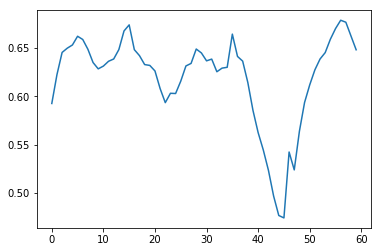

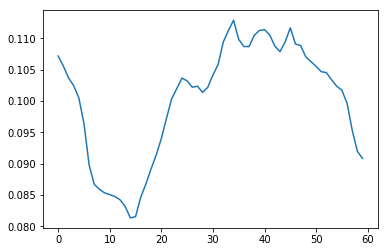

In [109]:
plt.plot(R2)
plt.show()
plt.plot(res)
plt.show()

In [51]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
XGBoost = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
XGBoost.fit(train_image_flattened, train_label_flattened)

KeyboardInterrupt: 

In [ ]:
pred= XGBoost.predict(train_image_flattened[0])

# MLP